Project 2

Nilanjan Debnath


In this part of the project, we define the problem that we are trying to solve, train the model and eventually evaluate the model.

# Problem Definition

First we clone the data set that we created in part 1 of the project. We have already cleaned and prepared the dataset. As you can see, there are two datasets, one is the cleaned data and the other one is a dataset containing the principal components.

In [ ]:
!git clone https://github.com/Nilanjan96/Project_1_AML

Cloning into 'Project_1_AML'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 1.30 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
output_1 = pd.read_csv("Project_1_AML/output_1.csv")
output_2 = pd.read_csv("Project_1_AML/output_2.csv")
output_2 = output_2.dropna()

In [ ]:
output_1.head()

,Datetime,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2022-09-27 15:30:00-04:00,1.214803e+06,8.961460e+05,-3.538854e+05,5.903510e+05,-1972.173508,-36.999661,-2.067011,8.705096
1,2022-09-28 09:30:00-04:00,3.676684e+07,-1.341547e+07,-3.795651e+06,-1.108325e+06,-2489.930492,-23.647028,6.999285,6.668554
2,2022-09-28 10:30:00-04:00,1.120019e+07,-3.138347e+06,-1.127941e+06,-3.168569e+05,-1274.832387,-30.053050,-3.798498,8.705062
3,2022-09-28 11:30:00-04:00,6.106434e+06,-2.648850e+06,-1.163725e+06,-5.860009e+05,-60.314688,-31.621355,-7.002194,6.850705
4,2022-09-28 12:30:00-04:00,4.318613e+06,-2.884104e+06,-1.643001e+06,-5.575848e+05,188.021075,-32.108767,-8.535963,5.908329


In [ ]:
output_2.head()

,Datetime,Open,Volume,Insider Stock Sold,MSFT_Volume,META_Volume,XOM_Open,XOM_Volume,MACD,MACD_Hist,...,XOM_Return,Volatility,MSFT_Volatility,GOOGL_Volatility,META_Volatility,XOM_Volatility,MSFT_Momentum,GOOGL_Momentum,META_Momentum,XOM_Momentum
209,2022-09-27 15:30:00-04:00,151.520004,8325653,0.0,2867584,4513041,86.040001,2699647,-0.320565,0.168733,...,-0.003138,7.649342,16.911188,6.682023,11.343556,3.776780,-15.589996,-6.830002,-18.750000,-9.579994
210,2022-09-28 09:30:00-04:00,147.639999,46429912,0.0,7040846,8098457,86.120003,3837593,-0.620001,-0.104562,...,0.013759,7.649012,16.848828,6.660074,11.346798,3.808233,-12.774887,-5.645203,-11.979996,-10.232597
211,2022-09-28 10:30:00-04:00,147.354996,19021163,0.0,4319611,5462689,86.959999,2644243,-0.889009,-0.298856,...,0.010122,7.642296,16.774965,6.631913,11.325533,3.829064,-13.870010,-5.589996,-11.645599,-10.199997
212,2022-09-28 11:30:00-04:00,146.860001,14416388,0.0,3147627,3716756,87.820000,1848086,-1.065709,-0.380445,...,0.000114,7.632759,16.686813,6.593554,11.294092,3.851514,-12.089996,-5.331497,-11.119095,-10.409996
213,2022-09-28 12:30:00-04:00,147.149994,13068925,0.0,2219690,2860232,87.830002,1580122,-1.131376,-0.356890,...,0.001025,7.615817,16.585280,6.552703,11.248510,3.871643,-11.364990,-5.370003,-10.760010,-10.250000


In [ ]:
output_1.shape

(3128, 9)

In [ ]:
output_2.shape

(3128, 25)

Our target variable is the 'Open' price of the stock. Basically we will be classifying if the stock 'Open' price of Apple, is went up or down, with respect to the day before.
The history we have data from  22-8-2016 till 2024-07-15. We take the last 36 days to be the performance window (test data) where we compare the various classification models against each other.  

What we are doing in the next few cells is that we are adding the target variable to the principal component dataset.

In [ ]:
column_to_add = output_2['Open'].to_numpy()

output_1['Open'] = column_to_add

In [ ]:
output_1.head()

,Datetime,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Open
0,2022-09-27 15:30:00-04:00,1.214803e+06,8.961460e+05,-3.538854e+05,5.903510e+05,-1972.173508,-36.999661,-2.067011,8.705096,151.520004
1,2022-09-28 09:30:00-04:00,3.676684e+07,-1.341547e+07,-3.795651e+06,-1.108325e+06,-2489.930492,-23.647028,6.999285,6.668554,147.639999
2,2022-09-28 10:30:00-04:00,1.120019e+07,-3.138347e+06,-1.127941e+06,-3.168569e+05,-1274.832387,-30.053050,-3.798498,8.705062,147.354996
3,2022-09-28 11:30:00-04:00,6.106434e+06,-2.648850e+06,-1.163725e+06,-5.860009e+05,-60.314688,-31.621355,-7.002194,6.850705,146.860001
4,2022-09-28 12:30:00-04:00,4.318613e+06,-2.884104e+06,-1.643001e+06,-5.575848e+05,188.021075,-32.108767,-8.535963,5.908329,147.149994


What we do here is that we make a seperate column, which basically notes that if the Open price of the stock has gone up since the day before, it records a '1', if the open price of the stock has gone down since the day before, it records a '0'.

In [ ]:
output_1['Open_1'] = np.nan

# Apply the condition
output_1.loc[1:, 'Open_1'] = np.where(output_1['Open'][1:].values > output_1['Open'][:-1].values, 1, 0)

In [ ]:
output_1

,Datetime,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Open,Open_1
0,2022-09-27 15:30:00-04:00,1.214803e+06,8.961460e+05,-3.538854e+05,5.903510e+05,-1972.173508,-36.999661,-2.067011,8.705096,151.520004,NaN
1,2022-09-28 09:30:00-04:00,3.676684e+07,-1.341547e+07,-3.795651e+06,-1.108325e+06,-2489.930492,-23.647028,6.999285,6.668554,147.639999,0.0
2,2022-09-28 10:30:00-04:00,1.120019e+07,-3.138347e+06,-1.127941e+06,-3.168569e+05,-1274.832387,-30.053050,-3.798498,8.705062,147.354996,0.0
3,2022-09-28 11:30:00-04:00,6.106434e+06,-2.648850e+06,-1.163725e+06,-5.860009e+05,-60.314688,-31.621355,-7.002194,6.850705,146.860001,0.0
4,2022-09-28 12:30:00-04:00,4.318613e+06,-2.884104e+06,-1.643001e+06,-5.575848e+05,188.021075,-32.108767,-8.535963,5.908329,147.149994,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3123,2024-07-12 11:30:00-04:00,-3.505019e+06,-3.514007e+05,-9.479053e+05,-7.862892e+05,1540.073424,15.338767,59.104202,0.899022,231.899994,1.0
3124,2024-07-12 12:30:00-04:00,-4.443382e+06,-3.599716e+05,-1.028286e+06,-7.228007e+05,1547.848148,13.243689,57.922400,-0.187195,230.710007,0.0
3125,2024-07-12 13:30:00-04:00,-4.028619e+06,-2.627118e+05,-9.684338e+05,-8.180626e+05,1674.338788,7.150077,63.633785,0.885116,231.899994,1.0
3126,2024-07-12 14:30:00-04:00,-4.864079e+06,3.943198e+05,-9.651203e+05,-6.082324e+05,1345.618522,9.433957,62.333851,-0.465884,232.264999,1.0


In [ ]:
output_1 = output_1.dropna()

Now, we set the validation dataset to 31st Jan 2024 to 7th May 2024, and the test data from 7th May 2024 to 12th June 2024.

The reason we take special care not to overlap the train, test and validation dataset is because, in stock market prediction, the temporal order of data is critical. The training set should consist of older data, the validation set should consist of more recent data that comes after the training set, and the test set should consist of the most recent data that comes after the validation set. This order simulates a real-world scenario where the model is trained on past data, validated on data slightly closer to the present, and tested on data that represents the immediate future. Overlapping the datasets would break this temporal order, leading to unrealistic and unreliable predictions.


In [ ]:
validation = math.ceil(0.1*output_1.shape[0])
test = math.ceil(0.15*output_1.shape[0])


# Split the dataset
train_data = output_1[:output_1.shape[0]-validation-test]
validation_data = output_1[output_1.shape[0]-validation-test:output_1.shape[0]-validation]
test_data = output_1[output_1.shape[0]-validation:]

In [ ]:
validation_data

,Datetime,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Open,Open_1
2345,2024-01-31 13:30:00-05:00,-3.597330e+06,1.596249e+05,9.967743e+05,-3.731741e+05,460.052810,23.433930,-0.575830,3.597408,186.169998,1.0
2346,2024-01-31 14:30:00-05:00,-4.658574e+05,1.202405e+05,2.773952e+06,2.469663e+05,-1432.226296,21.508628,0.866991,4.998778,185.669998,0.0
2347,2024-01-31 15:30:00-05:00,-6.060755e+05,3.830366e+05,2.966208e+06,2.538068e+05,-1458.460820,15.706898,4.068128,7.396213,185.520004,0.0
2348,2024-02-01 09:30:00-05:00,7.019132e+06,4.618596e+05,5.865376e+06,-5.493624e+05,-1227.738546,24.172270,7.935754,5.566908,184.250000,0.0
2349,2024-02-01 10:30:00-05:00,-1.735640e+06,1.985020e+05,1.485762e+06,-3.071667e+04,-541.727671,15.948921,4.688769,3.389329,186.119995,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2810,2024-05-07 09:30:00-04:00,1.433479e+07,-7.628566e+06,-1.784970e+06,1.245971e+06,-4643.585248,-25.229642,31.895750,-14.024755,183.449997,1.0
2811,2024-05-07 10:30:00-04:00,1.641279e+06,-2.626954e+06,-1.201785e+06,1.637819e+05,-970.821612,-18.528877,24.436027,-11.932295,182.824997,0.0
2812,2024-05-07 11:30:00-04:00,-1.254620e+06,-1.167145e+06,-1.638369e+06,-1.552600e+05,76.472024,-18.851079,24.073067,-11.757484,182.160004,0.0
2813,2024-05-07 12:30:00-04:00,-2.784069e+06,-1.279571e+06,-1.188708e+06,-6.983356e+04,54.450345,-22.387704,23.430432,-12.588298,181.520004,0.0


In [ ]:
test_data

,Datetime,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Open,Open_1
2815,2024-05-07 14:30:00-04:00,-3.504038e+06,-150285.668076,-4.091684e+05,4.890665e+04,-216.752094,-23.916338,25.592969,-10.603411,182.369995,0.0
2816,2024-05-07 15:30:00-04:00,-2.984102e+06,-465607.792542,1.050491e+06,2.049094e+06,-4494.118964,-27.407995,21.513348,-8.970057,182.630005,1.0
2817,2024-05-08 09:30:00-04:00,2.539860e+06,-721110.055763,-5.543471e+05,7.097148e+05,-2322.433940,-17.548181,25.261575,-7.390491,182.710007,1.0
2818,2024-05-08 10:30:00-04:00,-3.519786e+06,99771.638426,-5.872356e+05,6.430414e+05,-1395.910210,-16.859086,19.071580,-8.386092,181.889999,0.0
2819,2024-05-08 11:30:00-04:00,-4.210528e+06,-736913.134079,-1.105163e+06,-7.242517e+03,94.172809,-15.883089,18.998767,-8.149013,182.285004,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3123,2024-07-12 11:30:00-04:00,-3.505019e+06,-351400.739906,-9.479053e+05,-7.862892e+05,1540.073424,15.338767,59.104202,0.899022,231.899994,1.0
3124,2024-07-12 12:30:00-04:00,-4.443382e+06,-359971.628456,-1.028286e+06,-7.228007e+05,1547.848148,13.243689,57.922400,-0.187195,230.710007,0.0
3125,2024-07-12 13:30:00-04:00,-4.028619e+06,-262711.837154,-9.684338e+05,-8.180626e+05,1674.338788,7.150077,63.633785,0.885116,231.899994,1.0
3126,2024-07-12 14:30:00-04:00,-4.864079e+06,394319.793724,-9.651203e+05,-6.082324e+05,1345.618522,9.433957,62.333851,-0.465884,232.264999,1.0


#Model Training

For model training, we select logistic regression, Random Forest Classifier and Gradient Boosting classifier.

Logistic Regression:
Logistic regression is a linear model used for binary classification. It estimates the probability that a given input belongs to a certain class (in this case, whether the stock price will go up or down) by fitting a linear decision boundary. It’s straightforward, interpretable, and can work well when the relationship between features and the target is roughly linear.

Gradient Boosting Classifier:
Gradient Boosting is an ensemble technique that builds a model in a stage-wise fashion by combining the predictions of several weak learners, typically decision trees. It optimizes the model by correcting errors made in previous iterations. For stock price direction prediction, Gradient Boosting can capture complex non-linear relationships in the data, making it more powerful than Logistic Regression. However, it requires careful tuning of hyperparameters to avoid overfitting.

Random Forest Classifier:
Random Forest is another ensemble method that constructs multiple decision trees during training and outputs the mode of the classes (for classification) or mean prediction (for regression) of the individual trees. It is particularly effective at handling noisy data and reducing overfitting by averaging the results of many trees. For predicting stock price direction, Random Forest can model complex interactions between features and is more robust to overfitting compared to individual decision trees. However, it can be less interpretable than Logistic Regression and may require more computational resources.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_data = train_data.drop(columns=['Datetime', 'Open'])

In [ ]:
test_data = test_data.drop(columns=['Datetime', 'Open'])

In [ ]:
validation_data = validation_data.drop(columns=['Datetime', 'Open'])

In [ ]:
X_train = train_data.drop(columns=['Open_1'])
y_train = train_data['Open_1']
X_test = test_data.drop(columns=['Open_1'])
y_test = test_data['Open_1']

In [ ]:
X_valid = validation_data.drop(columns=['Open_1'])
y_valid = validation_data['Open_1']

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Dictionary to store the best models after tuning
best_models = {}

# Loop through each model
for model_name in models:
    print(f"Training and tuning {model_name}...")

    model = models[model_name]
    param_grid = param_grids[model_name]

    # Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning
    if model_name == 'Logistic Regression':
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    else:
        grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

    # Fit the model to the training data
    grid_search.fit(X_train, y_train)

    # Store the best model found after tuning
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Training and tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01}
Training and tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'max_depth': 10}
Training and tuning Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


#Model Evaluation

 We start by importing the necessary libraries, including matplotlib.pyplot and seaborn for visualizations, and several metrics from sklearn.metrics to evaluate the performance of our models. We then initialize an empty dictionary called model_performance to store the performance metrics for each of the models we have trained.

For each model in our best_models dictionary, we predict the outcomes on our test dataset (X_test). After making these predictions, we calculate key performance metrics, including accuracy, precision, recall, F1 score, and ROC-AUC score. These metrics are then stored in the model_performance dictionary, organized by the model name.

Next, we print out a detailed classification report for each model, which provides insights into how well each model is performing in terms of precision, recall, F1-score, and support for each class. Following this, we generate a confusion matrix for each model, which we visualize using seaborn. These visualizations allow us to see how well each model is distinguishing between the classes, highlighting true positives, false positives, true negatives, and false negatives.

Finally, we create a DataFrame from the model_performance dictionary to compare the performance of all models side by side. This comparison is printed out, giving us a clear view of which model performs best across the different evaluation metrics. Through this process, we can effectively evaluate and compare the predictive performance of our models.

Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.34      0.18      0.24       147
         1.0       0.48      0.68      0.57       166

    accuracy                           0.45       313
   macro avg       0.41      0.43      0.40       313
weighted avg       0.42      0.45      0.41       313



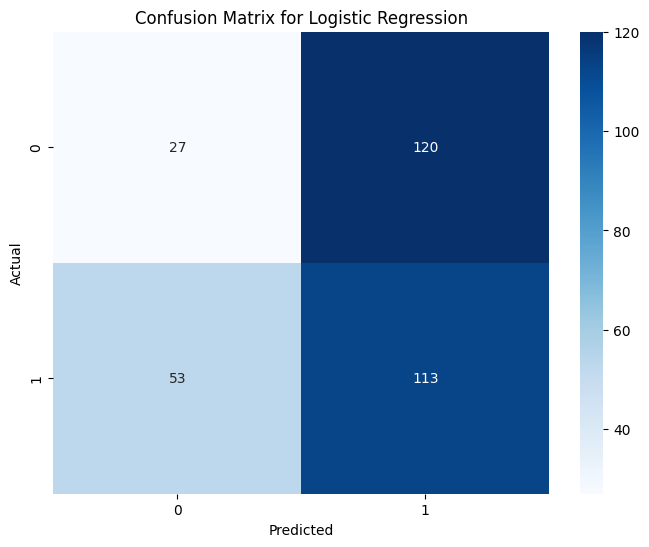

Evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.45      0.33      0.38       147
         1.0       0.52      0.64      0.58       166

    accuracy                           0.50       313
   macro avg       0.48      0.49      0.48       313
weighted avg       0.49      0.50      0.48       313



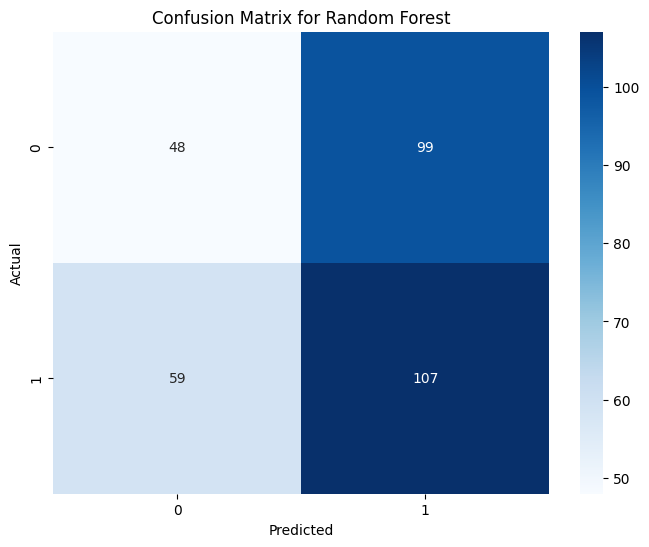

Evaluating Gradient Boosting...
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       147
         1.0       0.52      0.55      0.53       166

    accuracy                           0.49       313
   macro avg       0.49      0.49      0.49       313
weighted avg       0.49      0.49      0.49       313



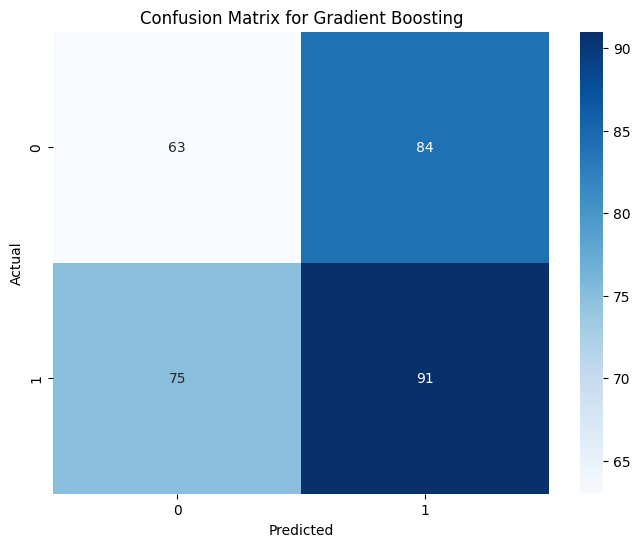


Model Comparison:
                     Accuracy  Precision    Recall  F1 Score  ROC-AUC Score
Logistic Regression  0.447284   0.484979  0.680723  0.566416       0.432198
Random Forest        0.495208   0.519417  0.644578  0.575269       0.485554
Gradient Boosting    0.492013   0.520000  0.548193  0.533724       0.488382


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Evaluate each model on the test set and generate metrics
model_performance = {}

for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='binary')
    recall = recall_score(y_test, y_test_pred, average='binary')
    f1 = f1_score(y_test, y_test_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_test_pred)

    # Store the performance metrics
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC Score': roc_auc
    }

    # Print classification report
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_test_pred)}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare the performance of the models
print("\nModel Comparison:")
comparison_df = pd.DataFrame(model_performance).T
print(comparison_df)


##Discuss the strengths and weaknesses of each model.

From the model comparison results, we can see how each model performs across various evaluation metrics. Starting with **Logistic Regression**, it exhibits a notable strength in recall, with a value of 0.680723, indicating that it is particularly effective at identifying true positives—correctly predicting when the stock price will move in the expected direction. However, this model's overall accuracy is the lowest among the three at 0.447284, which suggests that while it is good at catching true positives, it struggles with overall prediction accuracy. The ROC-AUC score of 0.432198 also indicates that Logistic Regression has difficulty distinguishing between the up and down movements in stock prices, reflecting its limitations in handling the non-linear relationships often present in financial data.

**Random Forest**, on the other hand, shows the highest accuracy at 0.495208, indicating it is the most reliable in making correct predictions across the board. It also has a balanced performance in precision (0.519417) and F1 score (0.575269), which shows that it manages to strike a good balance between precision and recall, reducing the number of false positives while still catching most of the true positives. The ROC-AUC score for Random Forest is 0.485554, better than Logistic Regression, suggesting that it is more effective at distinguishing between classes. However, Random Forest's recall is slightly lower than Logistic Regression, meaning it may miss some true positives. Its complexity and potential for longer training times are also considerations when deciding if it is the best model for the task.

**Gradient Boosting** shows a similar performance to Random Forest but with slight variations. Its accuracy is slightly lower at 0.492013, but it still outperforms Logistic Regression. Precision is on par with Random Forest at 0.520000, indicating it is equally effective at minimizing false positives. However, its recall drops to 0.548193, which suggests it is less effective at capturing true positives compared to both Logistic Regression and Random Forest. The F1 score of 0.533724 indicates that while Gradient Boosting balances precision and recall, it does so less effectively than Random Forest. The ROC-AUC score is 0.488382, the highest among the three, which shows its strength in distinguishing between classes. Despite this, Gradient Boosting’s performance is slightly less balanced, and like Random Forest, it can be computationally expensive and sensitive to overfitting if not carefully tuned.

In summary, while **Logistic Regression** excels in recall, its overall accuracy and ability to distinguish between classes are lacking. **Random Forest** offers the best balance across all metrics, making it the most reliable model overall, while **Gradient Boosting** provides strong class distinction but at the cost of lower recall and slightly less overall accuracy. Each model has its strengths, but the choice ultimately depends on the specific priorities of the task—whether it’s maximizing overall accuracy, recall, or the ability to distinguish between stock price movements.

##Determine which model performs best for predicting stock price movements and provide a justification for your choice

Random Forest’s strength in handling non-linear relationships, robustness to overfitting, ability to manage noisy data, and feature importance estimation likely contribute to its superior performance in predicting whether Apple stock prices go up or down. It captures complex patterns in the data more effectively than Logistic Regression and, in this case, might have been less prone to the overfitting challenges that can affect Gradient Boosting models.